In [1]:
from network_proc import *

In [2]:
cancer_gene_names_list = load_cancer_gene_name_from_file(filename = "cg-2022-06.csv")
gene_names_dict, gene_ids_dict = load_gene_mapping_from_file(filename = "identifier_mappings.txt")

In [14]:
directory = r'.\selected\Mania_Combined'

In [12]:
###  remove the header of file  ###
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        full_path_name = os.path.join(directory, filename)
        delete_line(full_path_name, 0)
    else:
        continue

In [13]:
network_aucs = {}
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        full_path_name = os.path.join(directory, filename)
        G = load_weighted_G_from_file(full_path_name)
        sort_gene_cen_list = cal_comb_weight_cen_sortedlist(G)
        x_fpr, y_tpr = cal_roc_xy(sort_gene_cen_list, cancer_gene_names_list, gene_names_dict, interval = 100)
        network_aucs[filename] = auc(y_tpr)
    else:
        continue

In [15]:
network_aucs_sorted = sorted(network_aucs.items(), key = operator.itemgetter(1), reverse = True)

In [16]:
with open('combined-net-scores.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    tsv_writer.writerow(['network name', 'score'])
    for net in network_aucs_sorted:
        tsv_writer.writerow(net)    

# Check combined network #

In [3]:
file_pre = "COMBINED"
comb_directory = r'.\selected\Mania_Combined'

In [4]:
network_aucs = {}
for filename in os.listdir(comb_directory):
    if filename.startswith(file_pre):
        full_path_name = os.path.join(comb_directory, filename)
        G = load_weighted_G_from_file(full_path_name)
        sort_gene_cen_list = cal_comb_weight_cen_sortedlist(G, large_net = True)
        x_fpr, y_tpr = cal_roc_xy(sort_gene_cen_list, cancer_gene_names_list, gene_names_dict, interval = 100)
        network_aucs[filename] = auc(y_tpr)
    else:
        continue

In [5]:
filepath = os.path.join(comb_directory, file_pre + '-auc.tsv')
with open(filepath, 'w') as write_obj:
    write_obj.write(list(network_aucs.items())[0][0] + '\t' + str(list(network_aucs.items())[0][1]) + '\n')
list(network_aucs.items())[0]

('COMBINED.DEFAULT_NETWORKS.BP_COMBINING.txt', 0.766820728291317)

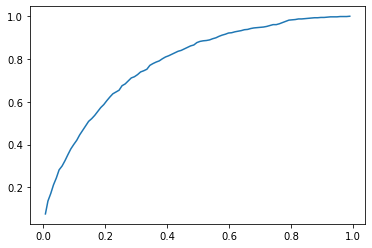

In [6]:
plt.plot(x_fpr, y_tpr)
plt.show()

In [7]:
filepath = os.path.join(comb_directory, file_pre + '-gene-cent.tsv')
with open(filepath, 'w') as write_obj:
    for edge in sort_gene_cen_list:
        write_obj.write(edge[0] + '\t' + str(edge[1]) + '\n')

In [8]:
filepath = os.path.join(comb_directory, file_pre + '-fpr-tpr.tsv')
with open(filepath, 'w') as write_obj:
    for i in range(len(x_fpr)):
        write_obj.write(str(x_fpr[i]) + '\t' + str(y_tpr[i]) + '\n')